<h1>2022.05.05. HW</h1>

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
diabetes = pd.read_csv("C:/ai_dataset/diabetes.csv")

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h2>1. 데이터 셋을 이용하여 딥러닝으로 분류 수행</h2>

In [5]:
y = diabetes['Outcome']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [6]:
X = diabetes.iloc[:,0:8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(64,input_shape=(8,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.7959 - accuracy: 0.5358 - val_loss: 0.6056 - val_accuracy: 0.7338
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.5798 - val_loss: 0.5832 - val_accuracy: 0.7208
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6254 - val_loss: 0.5721 - val_accuracy: 0.7273
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6303 - val_loss: 0.5648 - val_accuracy: 0.7273
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6319 - val_loss: 0.5625 - val_accuracy: 0.7273
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6564 - val_loss: 0.5614 - val_accuracy: 0.7403
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6840 - val_loss: 0.5579 - val_accuracy: 0.7403
Epoch 8/100
2

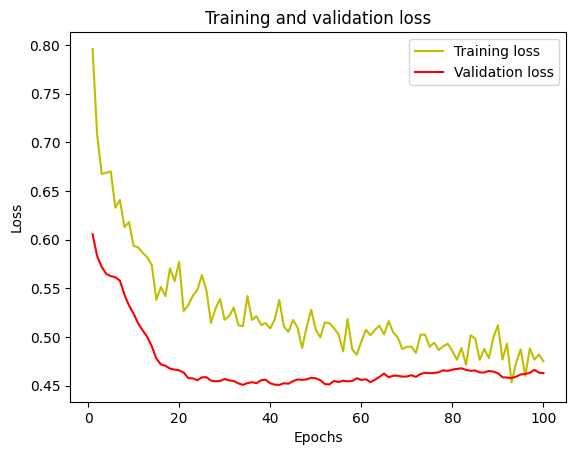

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

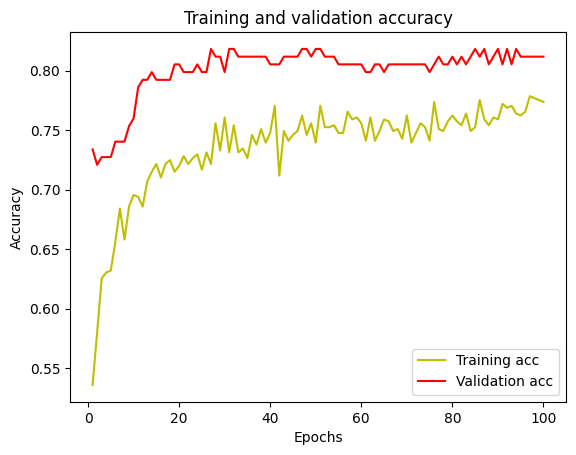

In [12]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()